<a href="https://colab.research.google.com/github/Eduardo-Unicamp/pylabs/blob/master/tubo_aberto_fechado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit#para a regressao
from scipy.signal import find_peaks#pra achar os picos de n no grafico do Phyphox
import os#pra iterar nas pastas

In [2]:
#importando dados q eu coletei

main_dir = '/content/drive/MyDrive/F259_Data/exp3/tubo_af_novo'
af_df = []
cal_df = []

for foldername in os.listdir(main_dir):#pra cada pasta em tubo_af_novo
    if foldername == 'fechado-fechado':
        for filename in os.listdir(main_dir+'/'+foldername):#pra cada arquivo
            if filename.endswith(".csv"):
                af_df = pd.read_csv(main_dir+'/'+foldername+'/'+filename)
                print(main_dir+'/'+foldername+'/'+filename)#debug
    elif foldername == 'calibracao':
        for filename in os.listdir(main_dir+'/'+foldername):#pra cada arquivo
            if filename.endswith(".csv"):
                cal_df = pd.read_csv(main_dir+'/'+foldername+'/'+filename)
                print(main_dir+'/'+foldername+'/'+filename)#debug


/content/drive/MyDrive/F259_Data/exp3/tubo_af_novo/calibracao/Acoustic Resonance.csv
/content/drive/MyDrive/F259_Data/exp3/tubo_af_novo/fechado-fechado/Acoustic Resonance.csv


In [3]:
#constantes
D = 0.0405#m
r = D/2
L = 0.51#m
L = L + 0.6*2*r
v_wolfram = 345.55#m/s
v=v_wolfram


#funções
def linear_func(x, a, b):
    return a * x + b

In [4]:
af_df#panorama geral do dataframe

,frequency (Hz),audio amplitude (a.u.)
0,100.0,1.356138
1,120.0,2.253161
2,140.0,4.674529
3,160.0,7.225081
4,180.0,5.479913
...,...,...
140,2900.0,72.124602
141,2920.0,58.196898
142,2940.0,47.379304
143,2960.0,49.114880


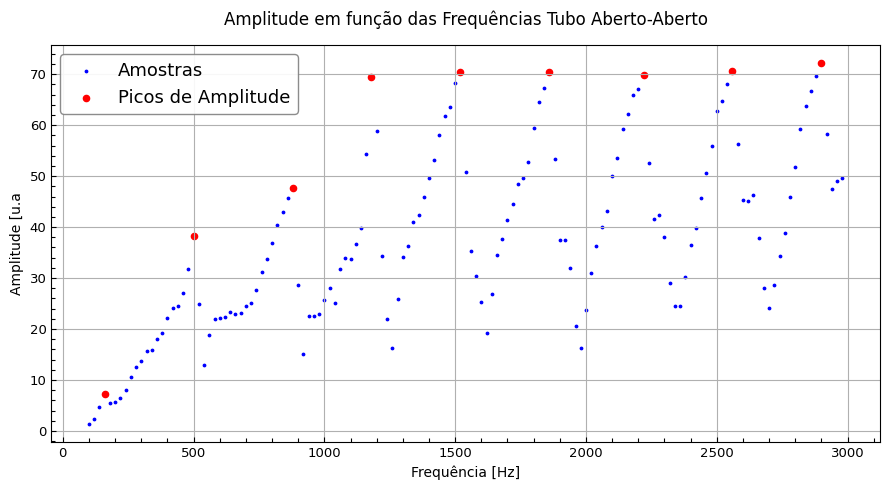

In [5]:

X = af_df['frequency (Hz)'].values
y = af_df['audio amplitude (a.u.)'].values

# Detecta os picos no sinal com uma distância mínima de 20 amostras entre eles
picos, _ = find_peaks(y, distance=15)

# Obtém os valores de frequência e amplitude nos picos detectados
peak_frequencies = X[picos]
peak_amplitudes = y[picos]

# Cria a figura e os eixos para o gráfico
fig, ax = plt.subplots(figsize=(9, 5))

# Plota o sinal original
ax.scatter(X, y, label='Amostras', color='blue',s=3)

# Destaca os picos detectados
ax.scatter(peak_frequencies, peak_amplitudes, color='red', label='Picos de Amplitude', s=20)

#Formatação
ax.set_title("Amplitude em função das Frequências Tubo Aberto-Aberto", pad=15)
ax.set_xlabel("Frequência [Hz]")
ax.set_ylabel("Amplitude [u.a")
ax.tick_params(axis='both', direction='in', labelsize=9.5)
ax.grid(True)
ax.minorticks_on()
ax.tick_params(which='minor', length=3, width=0.8, direction='in')
# Opcional: definir ticks de forma mais elegante
ax.locator_params(axis='x', nbins=10)
ax.locator_params(axis='y', nbins=10)


# Legenda com borda e fundo transparentes
leg = ax.legend(frameon=True,fontsize=13)
leg.get_frame().set_edgecolor('gray')
leg.get_frame().set_alpha(0.9)

plt.tight_layout()

plt.show()


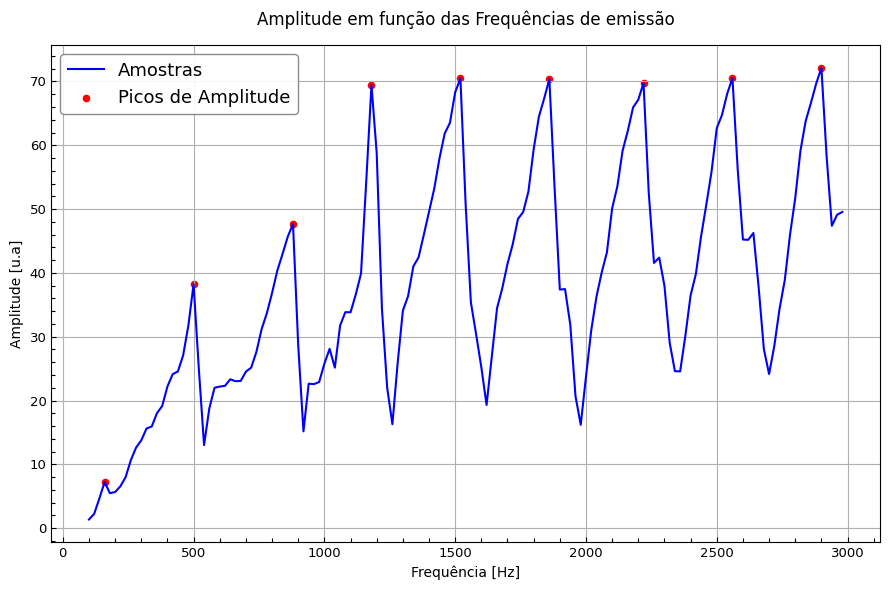

In [6]:
#  VERSÃO COM LINHAS DE LIGAÇÃO PARA MELHOR VISUALIZAÇÃO DAS TENDENCIAS

X = af_df['frequency (Hz)'].values
y = af_df['audio amplitude (a.u.)'].values

# Detecta os picos no sinal com uma distância mínima de 20 amostras entre eles
picos, _ = find_peaks(y, distance=15)

# Obtém os valores de frequência e amplitude nos picos detectados
peak_frequencies = X[picos]
peak_amplitudes = y[picos]

# Cria a figura e os eixos para o gráfico
fig, ax = plt.subplots(figsize=(9, 6))

# Plota o sinal original
ax.plot(X, y, label='Amostras', color='blue')

# Destaca os picos detectados
ax.scatter(peak_frequencies, peak_amplitudes, color='red', label='Picos de Amplitude', s=20)


#Formatação
ax.set_title("Amplitude em função das Frequências de emissão", pad=15)
ax.set_xlabel("Frequência [Hz]")
ax.set_ylabel("Amplitude [u.a]")
ax.tick_params(axis='both', direction='in', labelsize=9.5)
ax.grid(True)
ax.minorticks_on()
ax.tick_params(which='minor', length=3, width=0.8, direction='in')
# Opcional: definir ticks de forma mais elegante
ax.locator_params(axis='x', nbins=10)
ax.locator_params(axis='y', nbins=10)


# Legenda com borda e fundo transparentes
leg = ax.legend(frameon=True,fontsize=13)
leg.get_frame().set_edgecolor('gray')
leg.get_frame().set_alpha(0.9)

plt.tight_layout()

plt.show()


[1, 3, 5, 7, 9, 11, 13, 15, 17] [ 160.  500.  880. 1180. 1520. 1860. 2220. 2560. 2900.]


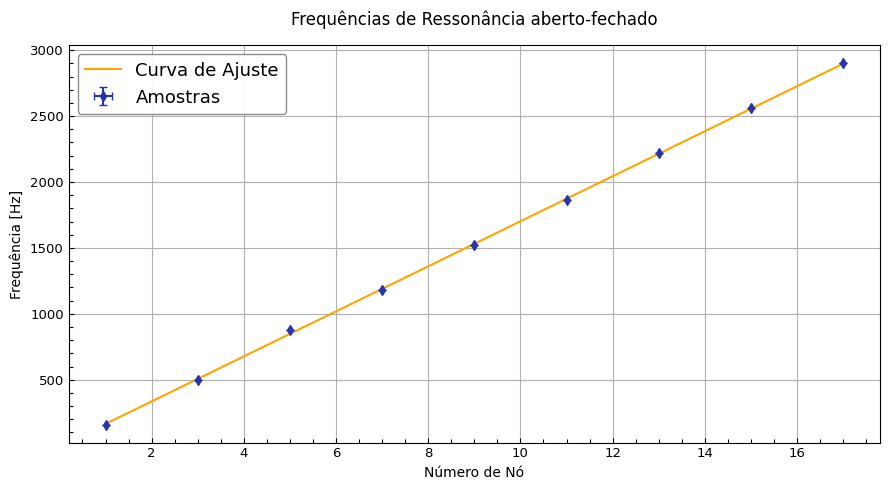

In [7]:
#PLOT DA FREQUENCIA EM FUNÇÃO DOS N

n = [2*i + 1 for i in range(len(peak_frequencies))]
f = peak_frequencies
print(n,peak_frequencies)
X,y = n,f
yerr=0.1#mudar isso pra incerteza
fig2, ax2 = plt.subplots(figsize=(9, 5))


# Plota o sinal original
ax2.errorbar(X, y, xerr=0, yerr=yerr,
            fmt='d', color='#2635ab', markersize=5,
            capsize=3, linestyle='none', label='Amostras', zorder=3)

#Curva

coeficientes, covariancia = curve_fit(linear_func, X, y)
X_fit = np.linspace(min(n),max(n),100)
y_fit = linear_func(X_fit,*coeficientes)
ax2.plot(X_fit,y_fit,linewidth=1.5,color='orange',label='Curva de Ajuste')

#formatação
ax2.set_title("Frequências de Ressonância aberto-fechado", pad=15)
ax2.set_xlabel("Número de Nó")
ax2.set_ylabel("Frequência [Hz]")
ax2.tick_params(axis='both', direction='in', labelsize=9.5)
ax2.grid(True)
ax2.minorticks_on()
ax2.tick_params(which='minor', length=3, width=0.8, direction='in')

# Opcional: definir ticks de forma mais elegante
ax2.locator_params(axis='x', nbins=10)
ax2.locator_params(axis='y', nbins=10)


# Legenda com borda e fundo transparentes
leg = ax2.legend(frameon=True,fontsize=13)
leg.get_frame().set_edgecolor('gray')
leg.get_frame().set_alpha(0.9)

plt.tight_layout()

plt.show()


In [8]:
#CALCULO DE v

a = coeficientes[0]
b = coeficientes[1]
print(f'a: {a}\nb: {b}')

a: 170.83333354894427
b: -6.388888047113937


In [9]:
v = a*4*L
print(v)

365.1050004608037


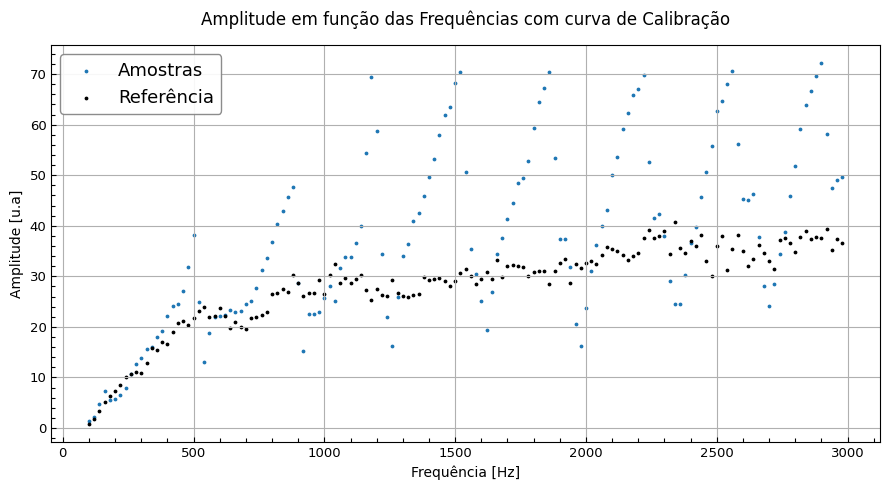

In [10]:
X = af_df['frequency (Hz)'].values[:950]
y = af_df['audio amplitude (a.u.)'].values[:950]

Xcalib = cal_df['frequency (Hz)'].values[:950]
ycalib = cal_df['audio amplitude (a.u.)'].values[:950]

fig3, ax3 = plt.subplots(figsize=(9, 5))

ax3.scatter(X, y, s=3, label="Amostras")
ax3.scatter(Xcalib, ycalib, s=3, color='black', label="Referência")

ax3.set_title("Amplitude em função das Frequências com curva de Calibração", pad=15)
ax3.set_xlabel("Frequência [Hz]")
ax3.set_ylabel("Amplitude [u.a]")

ax3.tick_params(axis='both', direction='in', labelsize=9.5)
ax3.grid(True)
ax3.minorticks_on()
ax3.tick_params(which='minor', length=3, width=0.8, direction='in')

# Ticks ajustados
ax3.locator_params(axis='x', nbins=10)
ax3.locator_params(axis='y', nbins=10)

# Legenda com borda e fundo transparentes
leg = ax3.legend(frameon=True, fontsize=13)
leg.get_frame().set_edgecolor('gray')
leg.get_frame().set_alpha(0.9)

plt.tight_layout()
plt.show()


In [11]:
from math import log10
yaa_calibrado = []
for i in range(len(X)):
    if ycalib[i]!=0:
        yaa_calibrado.append(10*log10(y[i]/ycalib[i]))
    else:
        yaa_calibrado.append(0)

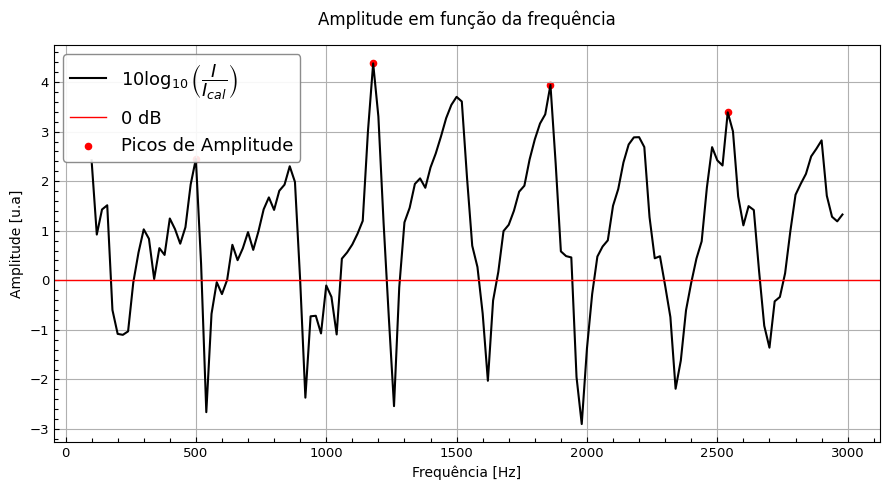

In [12]:
fig4, ax4 = plt.subplots(figsize=(9, 5))

# Curva principal com legenda
ax4.plot(X, yaa_calibrado, color='black', label=r"$10\log_{10}\left(\dfrac{I}{I_{cal}}\right)$")

# Linha vermelha horizontal em y = 0 com legenda
ax4.axhline(y=0, color='red', linewidth=1, label="0 dB")

# Picos
picos, _ = find_peaks(yaa_calibrado, distance=20)  # indices dos picos, o traço é pq ele devolve mais um monte de coisa dps q n vou usar

peak_frequencies = X[picos]
peak_amplitudes = np.array(yaa_calibrado)[picos]


ax4.scatter(peak_frequencies, peak_amplitudes, color='red', label='Picos de Amplitude', s=20)

# Formatação
ax4.set_title("Amplitude em função da frequência", pad=15)
ax4.set_xlabel("Frequência [Hz]")
ax4.set_ylabel("Amplitude [u.a]")
ax4.tick_params(axis='both', direction='in', labelsize=9.5)
ax4.grid(True)
ax4.minorticks_on()
ax4.tick_params(which='minor', length=3, width=0.8, direction='in')

# Ticks
ax4.locator_params(axis='x', nbins=10)
ax4.locator_params(axis='y', nbins=10)

# Legenda estilizada
leg = ax4.legend(frameon=True, fontsize=13)
leg.get_frame().set_edgecolor('gray')
leg.get_frame().set_alpha(0.9)

plt.tight_layout()
plt.show()


In [15]:
print(peak_frequencies)


[ 500. 1180. 1860. 2540.]
